In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [3]:
df_desc_null_actions = pd.read_csv("df_null_action.csv", nrows=10000)
df_desc_null_actions['2']

0       NOTICE:  Citation on Petition for Formal Adjud...
1                       Citation Filed; Served as Ordered
2       An Interested Person,Johanna Soris, Asst. Atto...
3        Letters of Authority for Personal Representative
4       NOTICE:  Citation on Petition for Formal Adjud...
                              ...                        
9995    MAGISTRATE TRIAL IN PROGRESS SCHEDULED TO CONT...
9996    Magistrate trial held ( Sargent, Dennis ) (Tap...
9997                      Will dated 1/27/87  --  3 pages
9998           Misc Entry: Letter filed by the defendant.
9999                  Appearance for  filed by Attorney .
Name: 2, Length: 10000, dtype: object

In [4]:
# Vectorize the descriptions.
tfidf = TfidfVectorizer(min_df=5, max_df = 0.95, max_features = 8000, stop_words = 'english')

# features = tfidf.fit_transform(dataset['0'].astype('U'))
description_mia_vectorized = tfidf.fit_transform(df_desc_null_actions['2'].astype('U'))

In [ ]:
description_mia_vectorized

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters
Fit 74 clusters
Fit 76 clusters
Fit 78 clusters
Fit 80 clusters
Fit 82 clusters
Fit 84 clusters
Fit 86 clusters
Fit 88 clusters
Fit 90 clusters
Fit 92 clusters
Fit 94 clusters
Fit 96 clusters
Fit 98 clusters
Fit 100 clusters
Fit 102 clusters
Fit 104 clusters
Fit 106 clusters
Fit 108 clusters
Fit 110 clusters
Fit 112 clusters
Fit 114 clusters
Fit 116 clusters
Fit 118 clusters
Fit 120 clusters
Fit 122 clusters
Fit 124 clusters

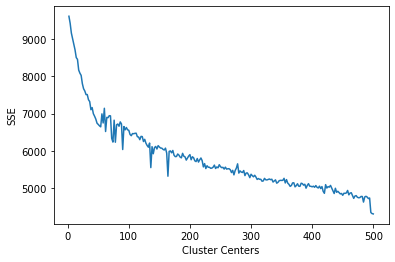

In [10]:
# Create a kmeans model on our data, using k clusters. Compile a list of SSEs for each k.
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    plt.plot(iters, sse)
    plt.xlabel("Cluster Centers")
    plt.ylabel("SSE")
#     f, ax = plt.subplots(1, 1)
#     ax.plot(iters, sse, marker='o')
#     ax.set_xlabel('Cluster Centers')
#     ax.set_xticks(iters)
#     ax.set_xticklabels(iters)
#     ax.set_ylabel('SSE')
#     ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(description_mia_vectorized, 500)

In [11]:
clusters = MiniBatchKMeans(n_clusters=50, init_size=1024, batch_size=2048, random_state=20).fit_predict(description_mia_vectorized)

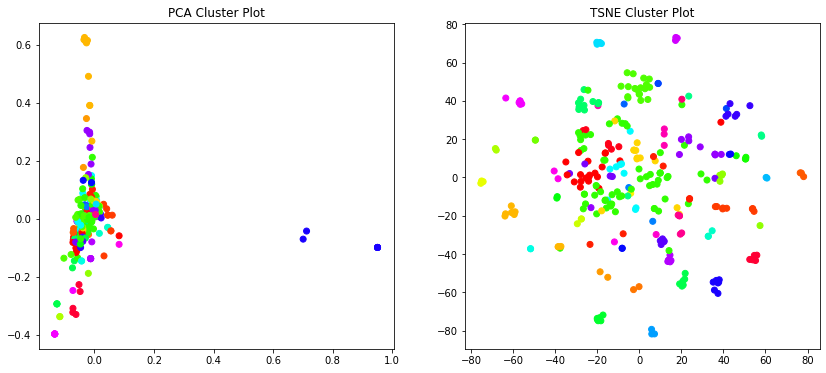

In [12]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(description_mia_vectorized, clusters)
    

In [14]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(description_mia_vectorized, clusters, tfidf.get_feature_names(), 50)


Cluster 0
rule,deft,memorandum,support,new,mutual,11,order,safety,north,13,plff,court,dismissal,d01,leave,sanctions,shore,complaint,file,discovery,summary,chiropractic,reconsideration,plaintiff,defendants,12,default,defendant,allowed,ies,party,compel,limine,p01,mass,civ,amend,llc,vacate,trial,continue,assented,insurance,company,opposition,judgment,dismiss,filed,motion

Cluster 1
orders,continue,misc,summary,pretrial,findings,dismissal,11,entry,annexed,possession,motion,robert,finding,allowed,judgment,new,00,plaintiff,copy,continued,martha,notice,days,date,boyle,william,30,payment,trial,settlement,agreement,review,case,defendant,brennan,13,filed,mailed,court,interested,12,memorandum,information,rights,jointly,hon,order,notified,parties

Cluster 2
2012,07,casey,executor,30,nolan,26,jeremy,stahlin,rick,schmidt,donnelly,02,11,pamela,edward,28,perrino,anastasia,leary,magistrate,2013,terri,july,ma,03,cafazzo,13,corporate,pr,representative,01,ann,hon,natola,toni,waiver,2014,personal,12,julie